# Classificação de Autismo: Análise de Distâncias Faciais

Este notebook tem como objetivo classificar o autismo com base em medições de distâncias faciais. Usaremos conjuntos de dados contendo distâncias calculadas a partir de marcos faciais para indivíduos com e sem autismo. A classificação será realizada utilizando os algoritmos K-Nearest Neighbors (KNN) e Random Forest.

## Tabela de Conteúdos

1. [Importação de Bibliotecas](#importação-de-bibliotecas)
2. [Carregamento dos Dados](#carregamento-dos-dados)
3. [Pré-processamento de Dados](#pré-processamento-de-dados)
4. [Análise Exploratória de Dados](#análise-exploratória-de-dados)
5. [Treinamento e Avaliação do Modelo](#treinamento-e-avaliação-do-modelo)
   - [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
   - [Classificador Random Forest](#classificador-random-forest)


### Importando bibliotecas


In [21]:
#importação-de-bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


### Carregamento de dados

Carregar os conjuntos de dados contendo as distâncias faciais para indivíduos com e sem autismo.


In [22]:
# Carregar os conjuntos de dados
df_no_autism = pd.read_csv("../../data/preprocessed_landmark/distances_no_autism.csv")
df_with_autism = pd.read_csv("../../data/preprocessed_landmark/distances_with_autism.csv")

# Combinar os conjuntos de dados
data_total = pd.concat([df_no_autism, df_with_autism], ignore_index=True)


### Pré-processamento de Dados

Padronizar as características relevantes para melhorar o desempenho dos modelos de aprendizado de máquina.


In [23]:
# Pré-processar os dados
standardScaler = StandardScaler()

# Selecionar colunas a serem padronizadas (atualize com base nas suas colunas de distância)
columns_to_scale = ['middle_facial_height', 'lower_facial_height', 
                    'philtrum', 'intercanthal_width', 'biocular_width', 'nasal_width', 'mouth_width']

data_total[columns_to_scale] = standardScaler.fit_transform(data_total[columns_to_scale])


### Análise Exploratória de Dados

Análise exploratória inicial para entender melhor o conjunto de dados.


      samples  class  middle_facial_height  lower_facial_height  philtrum  \
0         2.0    0.0              0.178190             0.119158  0.496468   
1         3.0    0.0              0.557849             0.454658  0.479162   
2         5.0    0.0              0.276720             0.132265  0.951754   
3         6.0    0.0              0.359131             1.749756  0.757109   
4         7.0    0.0              0.282901             0.487104  0.547597   
...       ...    ...                   ...                  ...       ...   
2156   1462.0    1.0              0.638452             1.717460  1.204492   
2157   1463.0    1.0              0.304676             0.306685  1.748727   
2158   1465.0    1.0              0.037475             0.646759  0.757131   
2159   1466.0    1.0              0.374542             0.108698  0.494735   
2160   1468.0    1.0              0.189151             0.968810  0.760257   

      intercanthal_width  biocular_width  nasal_width  mouth_width  
0     

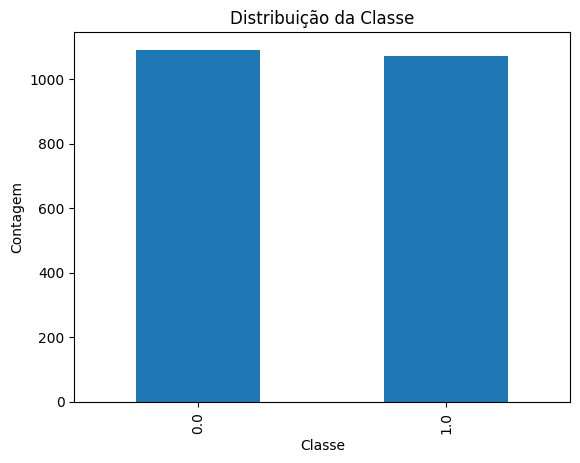

In [24]:
# Verificar a distribuição da variável alvo
data_total['class'].value_counts().plot(kind='bar', title='Distribuição da Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')

# Removendo linhas onde qualquer uma das colunas especificadas contém dados nulos
data_total_cleaned = data_total.dropna(subset=columns_to_scale)
data_total_cleaned[columns_to_scale] = data_total_cleaned[columns_to_scale].abs()

# Para verificar o resultado
print(data_total_cleaned)

In [30]:
# Calcular a correlação entre as variáveis numéricas e a variável de saída 'class'
correlation_matrix = data_total_cleaned.corr()

# Exibir a correlação da variável 'class' com as outras
correlation_with_class = correlation_matrix['class'].sort_values(ascending=False)

# Mostrar a correlação
print(correlation_with_class)



class                   1.000000
samples                 0.082431
lower_facial_height     0.061634
philtrum                0.012355
middle_facial_height   -0.005832
nasal_width            -0.068564
mouth_width            -0.087469
intercanthal_width     -0.113888
biocular_width         -0.115677
Name: class, dtype: float64


### Treinamento e Avaliação do Modelo

#### K-Nearest Neighbors (KNN)

Treinar um classificador KNN e avaliar seu desempenho usando validação cruzada.


      middle_facial_height  lower_facial_height  philtrum  intercanthal_width  \
0                 0.178190             0.119158  0.496468            0.948233   
1                 0.557849             0.454658  0.479162            0.283105   
2                 0.276720             0.132265  0.951754            0.511606   
3                 0.359131             1.749756  0.757109            0.346921   
4                 0.282901             0.487104  0.547597            0.114616   
...                    ...                  ...       ...                 ...   
2156              0.638452             1.717460  1.204492            0.103296   
2157              0.304676             0.306685  1.748727            0.190627   
2158              0.037475             0.646759  0.757131            0.039378   
2159              0.374542             0.108698  0.494735            0.251433   
2160              0.189151             0.968810  0.760257            0.755354   

      biocular_width  nasal

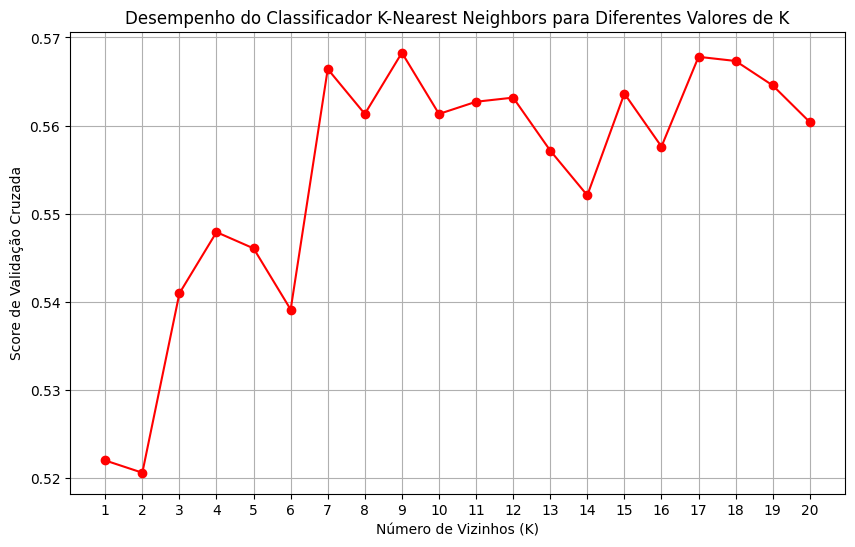

In [26]:
# Dividir os dados em características e variável alvo
y = data_total_cleaned['class']
 # Remover as colunas 'class' e 'samples'
X = data_total_cleaned.drop(['class', 'samples'], axis=1)

print(X)
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()


#### Classificador Random Forest

Treinar um classificador Random Forest e avaliar seu desempenho.


In [27]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.5608358934971839


#### Classificador CNN

Treinar um classificador Rede Neural Convolucional e avaliar seu desempenho.


### Tentativa utilizando apenas dados mais correlacionados

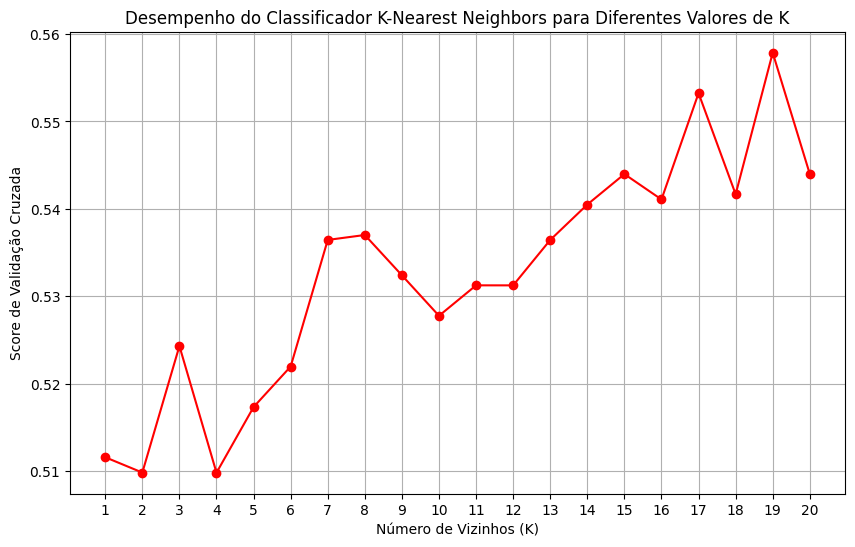

Desempenho do modelo KNN com K=1 no conjunto de teste: 0.5612


In [28]:
# Selecionar as três variáveis mais correlacionadas com a classe
selected_features = ['biocular_width', 'intercanthal_width', 'middle_facial_height']

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[selected_features]  # Apenas as variáveis selecionadas

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X_train, y_train, cv=10)  # Usar apenas o conjunto de treinamento
    knn_scores.append(score.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
plt.title('Desempenho do Classificador K-Nearest Neighbors para Diferentes Valores de K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Score de Validação Cruzada')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

# Testar com K=1 (melhor resultado)
best_k = 1
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Avaliar o desempenho no conjunto de teste
test_score = knn_classifier.score(X_test, y_test)
print(f"Desempenho do modelo KNN com K={best_k} no conjunto de teste: {test_score:.4f}")


In [29]:
# Treinar o modelo Random Forest
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(randomforest_classifier, X, y, cv=10)
print("Score do Random Forest: ", rf_score.mean())

Score do Random Forest:  0.5478985321727257


In [31]:
from sklearn.preprocessing import StandardScaler

# Normalizar as características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros que serão testados
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Fazer a busca em grade
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Ver os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)
print(f"Desempenho do modelo KNN com os melhores parâmetros no conjunto de teste: {test_score:.4f}")


Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Desempenho do modelo KNN com os melhores parâmetros no conjunto de teste: 0.5751


In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[selected_features]  # Apenas as variáveis selecionadas

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para o SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'gamma': ['scale', 'auto'],  # Coeficiente da função kernel
    'kernel': ['rbf', 'linear']  # Tipos de kernel a serem testados
}

# Fazer a busca em grade para otimizar os hiperparâmetros
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_svm = grid_search.best_estimator_
test_score = best_svm.score(X_test, y_test)
print(f"Desempenho do modelo SVM com os melhores parâmetros no conjunto de teste: {test_score:.4f}")


Melhores parâmetros: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Desempenho do modelo SVM com os melhores parâmetros no conjunto de teste: 0.5935


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Dividir os dados em características (X) e variável alvo (y)
y = data_total_cleaned['class']
X = data_total_cleaned[selected_features]  # Apenas as variáveis selecionadas

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para o MLP
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (100,)],  # Testar diferentes tamanhos de camadas ocultas
    'activation': ['relu', 'tanh'],  # Funções de ativação
    'solver': ['adam', 'sgd'],  # Otimizadores
    'learning_rate': ['constant', 'adaptive'],  # Taxa de aprendizado
}

# Fazer a busca em grade para otimizar os hiperparâmetros
grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_mlp = grid_search.best_estimator_
test_score = best_mlp.score(X_test, y_test)
print(f"Desempenho do modelo MLP com os melhores parâmetros no conjunto de teste: {test_score:.4f}")


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Dividir os dados em características e variável alvo
y = data_total_cleaned['class']
 # Remover as colunas 'class' e 'samples'
X = data_total_cleaned.drop(['class', 'samples'], axis=1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (opcional, XGBoost pode lidar com dados não normalizados, mas ajuda em alguns casos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir os parâmetros para o XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores
    'learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizado
    'max_depth': [3, 5, 7],  # Profundidade máxima da árvore
    'subsample': [0.8, 1.0],  # Proporção dos dados usados em cada árvore
    'colsample_bytree': [0.8, 1.0],  # Proporção de características usadas em cada árvore
    'gamma': [0, 0.1, 0.2]  # Parâmetro de regularização para evitar overfitting
}

# Inicializar o classificador XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fazer a busca em grade para otimizar os hiperparâmetros
grid_search = GridSearchCV(xgb_clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Testar o modelo com os melhores parâmetros no conjunto de teste
best_xgb = grid_search.best_estimator_
test_score = best_xgb.score(X_test, y_test)
print(f"Desempenho do modelo XGBoost com os melhores parâmetros no conjunto de teste: {test_score:.4f}")
